# Benford analysis  
Basic benford analysis using R "benford.analysis" package.

In [1]:
# Needs R kernel installed on Jupyter notebook
# https://github.com/IRkernel/IRkernel
library(benford.analysis)

In [2]:
data <- read.csv("../data/2016-08-08-last-year.xz")

In [3]:
head(data)

document_id,congressperson_name,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,subquota_description,⋯,net_value,month,year,installment,passenger,leg_of_the_trip,batch_number,reimbursement_number,reimbursement_value,applicant_id
5886345,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary activity,,165.65,11,2015,0,,,1255355,5294,NA,3074
5886361,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary activity,,59.48,12,2015,0,,,1255361,5294,NA,3074
5886341,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary activity,,130.95,11,2015,0,,,1255355,5294,NA,3074
5928783,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary activity,,193.06,12,2015,0,,,1268867,5370,NA,3074
5608486,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,1,Maintenance of office supporting parliamentary activity,,310.25,2,2015,0,,,1168538,4966,NA,3074
5772352,ABEL MESQUITA JR.,178957,1,2015,RR,DEM,55,3,Fuels and lubricants,,32.00,6,2015,0,,,1220276,5131,NA,3074


Benford object with analysis on first 2 digits:  

In [4]:
## Benford object and explorations
net_value.benford <- benford(data$net_value,number.of.digits = 2)

Plots for real frequencies, 2nd order test, summation, chi-squared and summation differences.

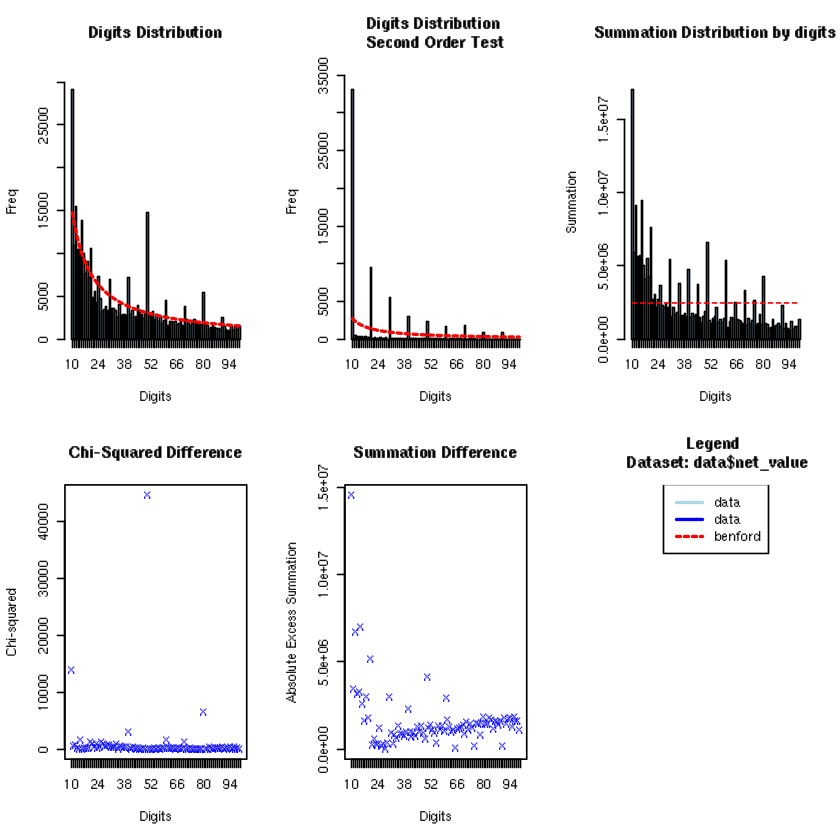

In [5]:
plot(net_value.benford)

Looks like we have great differences for 10 (highest absolute diff from expected) and 50 (highest chi-squared diff from expected). Rounded/biased net values are not crimes, however this can point to suspicious activities. Numeric values for largest deviations (10,50,80,40):  

In [6]:
# Description of analysis
print(net_value.benford)


Benford object:
 
Data: data$net_value 
Number of observations used = 356745 
Number of obs. for second order = 65597 
First digits analysed = 2

Mantissa: 

   Statistic   Value
        Mean  0.4743
         Var  0.0917
 Ex.Kurtosis -1.2986
    Skewness  0.0027


The 5 largest deviations: 

  digits absolute.diff
1     10      14327.37
2     50      11698.93
3     15       3855.89
4     80       3516.35
5     40       3391.31

Stats:

	Pearson's Chi-squared test

data:  data$net_value
X-squared = 90323, df = 89, p-value < 2.2e-16


	Mantissa Arc Test

data:  data$net_value
L2 = 0.0061734, df = 2, p-value < 2.2e-16

Mean Absolute Deviation: 0.003297309
Distortion Factor: -4.133436

Remember: Real data will never conform perfectly to Benford's Law. You should not focus on p-values!

These are the most frequent values  

In [7]:
frequent_values <- suspectsTable(net_value.benford)
head(frequent_values)

digits,absolute.diff
10,14327.367
50,11698.932
15,3855.893
80,3516.349
40,3391.315
12,3041.792


Let's select cases with net_values beginning with the 2 most frequent digits (10 and 50).  

In [8]:
suspects <- getSuspects(net_value.benford,data, how.many=2)

# Most frequent names associated with net values == 30 or 50
frequent_names_1050 <- sort(table(suspects$congressperson_name),decreasing =T)
head(frequent_names_1050)


         MARCO MAIA      CELSO MALDANER JOSE ST\303\211DILE             LEANDRE 
                499                 320                 305                 287 
  ERIVELTON SANTANA       ARNALDO JORDY 
                278                 270 

To do:  
( ) Improve analysis. I didn't study strategies for fraud detection yet. This is intuitive exploration using just the concept of Benford Distribution.  
( ) Discuss which numbers we should combine before the analysis. It looks like human related values (such as service prices) do note obey Benford distributions. https://www.agacgfm.org/AGA/FraudToolkit/documents/BenfordsLaw.pdf  ( ) Code function to return deviations measures (abs diff, squared diff) for each name contained in the dataset as an output. This can be used for feature engineering, serving as an input for the final classification algorithm.  